In [39]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, LinearRegression, Ridge, RidgeCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn import linear_model
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import plotly as py
import plotly.offline as pyo
import plotly.graph_objs as go
import statsmodels.api as sm
py.offline.init_notebook_mode(connected=True)


In [40]:
stats = pd.read_csv(r"C:\Users\Ahmed's Computer\Downloads\county_facts.csv" , )
pd.set_option('display.max_columns', 50)
stats.head()

,fips,area_name,state_abbreviation,PST045214,PST040210,PST120214,POP010210,AGE135214,AGE295214,AGE775214,SEX255214,RHI125214,RHI225214,RHI325214,RHI425214,RHI525214,RHI625214,RHI725214,RHI825214,POP715213,POP645213,POP815213,EDU635213,EDU685213,VET605213,...,HSG495213,HSD410213,HSD310213,INC910213,INC110213,PVY020213,BZA010213,BZA110213,BZA115213,NES010213,SBO001207,SBO315207,SBO115207,SBO215207,SBO515207,SBO415207,SBO015207,MAN450207,WTN220207,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,POP060210
0,0,United States,NaN,318857056,308758105,3.3,308745538,6.2,23.1,14.5,50.8,77.4,13.2,1.2,5.4,0.2,2.5,17.4,62.1,84.9,12.9,20.7,86.0,28.8,21263779,...,176700,115610216,2.63,28155,53046,15.4,7488353,118266253,2.0,23005620,27092908,7.1,0.9,5.7,0.1,8.3,28.8,5319456312,4174286516,3917663456,12990,613795732,1046363,3531905.43,87.4
1,1000,Alabama,NaN,4849377,4780127,1.4,4779736,6.1,22.8,15.3,51.5,69.7,26.7,0.7,1.3,0.1,1.5,4.1,66.2,85.0,3.5,5.2,83.1,22.6,388865,...,122500,1838683,2.55,23680,43253,18.6,97578,1603100,1.1,311578,382350,14.8,0.8,1.8,0.1,1.2,28.1,112858843,52252752,57344851,12364,6426342,13369,50645.33,94.4
2,1001,Autauga County,AL,55395,54571,1.5,54571,6.0,25.2,13.8,51.4,77.9,18.7,0.5,1.1,0.1,1.8,2.7,75.6,85.0,1.6,3.5,85.6,20.9,5922,...,136200,20071,2.71,24571,53682,12.1,817,10120,2.1,2947,4067,15.2,0.0,1.3,0.0,0.7,31.7,0,0,598175,12003,88157,131,594.44,91.8
3,1003,Baldwin County,AL,200111,182265,9.8,182265,5.6,22.2,18.7,51.2,87.1,9.6,0.7,0.9,0.1,1.6,4.6,83.0,82.1,3.6,5.5,89.1,27.7,19346,...,168600,73283,2.52,26766,50221,13.9,4871,54988,3.7,16508,19035,2.7,0.4,1.0,0.0,1.3,27.3,1410273,0,2966489,17166,436955,1384,1589.78,114.6
4,1005,Barbour County,AL,26887,27457,-2.1,27457,5.7,21.2,16.5,46.6,50.2,47.6,0.6,0.5,0.2,0.9,4.5,46.6,84.8,2.9,5.0,73.7,13.4,2120,...,89200,9200,2.66,16829,32911,26.7,464,6611,-5.6,1546,1667,0.0,0.0,0.0,0.0,0.0,27.0,0,0,188337,6334,0,8,884.88,31.0


In [3]:
stats = stats[['fips','area_name','state_abbreviation','PST045214','AGE775214','RHI225214','RHI725214','RHI825214','EDU635213','EDU685213','INC110213','PVY020213','POP060210']]
stats.rename(columns={'PST045214': 'Population', 'AGE775214': 'Age > 65','RHI225214':'Black','RHI725214':'Latino','RHI825214':'White','EDU635213':'HighSchool','EDU685213':'Bachelors','INC110213':'Median Household','PVY020213':'Poverty level','POP060210':'Population PSMile'}, inplace=True)
stats

,fips,area_name,state_abbreviation,Population,Age > 65,Black,Latino,White,HighSchool,Bachelors,Median Household,Poverty level,Population PSMile
0,0,United States,NaN,318857056,14.5,13.2,17.4,62.1,86.0,28.8,53046,15.4,87.4
1,1000,Alabama,NaN,4849377,15.3,26.7,4.1,66.2,83.1,22.6,43253,18.6,94.4
2,1001,Autauga County,AL,55395,13.8,18.7,2.7,75.6,85.6,20.9,53682,12.1,91.8
3,1003,Baldwin County,AL,200111,18.7,9.6,4.6,83.0,89.1,27.7,50221,13.9,114.6
4,1005,Barbour County,AL,26887,16.5,47.6,4.5,46.6,73.7,13.4,32911,26.7,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3190,56037,Sweetwater County,WY,45010,9.5,1.5,15.8,79.7,91.0,18.1,71525,11.3,4.2
3191,56039,Teton County,WY,22930,12.2,1.2,15.2,80.9,96.8,48.7,68078,8.2,5.3
3192,56041,Uinta County,WY,20904,11.0,0.9,9.2,87.3,89.2,18.9,58515,13.3,10.1
3193,56043,Washakie County,WY,8322,20.1,0.8,13.9,82.7,90.5,23.6,47104,12.1,3.8


In [4]:
gloss = pd.read_csv(r"C:\Users\Ahmed's Computer\Downloads\county_facts_dictionary.csv" , )
pd.set_option('display.max_columns', 50)
gloss

,column_name,description
0,PST045214,"Population, 2014 estimate"
1,PST040210,"Population, 2010 (April 1) estimates base"
2,PST120214,"Population, percent change - April 1, 2010 to ..."
3,POP010210,"Population, 2010"
4,AGE135214,"Persons under 5 years, percent, 2014"
5,AGE295214,"Persons under 18 years, percent, 2014"
6,AGE775214,"Persons 65 years and over, percent, 2014"
7,SEX255214,"Female persons, percent, 2014"
8,RHI125214,"White alone, percent, 2014"
9,RHI225214,"Black or African American alone, percent, 2014"


In [5]:
texas = stats.loc[stats['state_abbreviation'] == 'TX']
texas.head(20)

,fips,area_name,state_abbreviation,Population,Age > 65,Black,Latino,White,HighSchool,Bachelors,Median Household,Poverty level,Population PSMile
2568,48001,Anderson County,TX,57627,13.8,21.7,17.0,59.9,79.0,10.9,40653,20.3,55.0
2569,48003,Andrews County,TX,17477,9.9,2.2,54.6,41.6,73.6,14.2,57825,12.5,9.9
2570,48005,Angelina County,TX,87750,15.0,15.7,21.2,61.5,78.2,15.0,41354,19.3,108.8
2571,48007,Aransas County,TX,24972,26.6,2.0,26.7,67.9,86.0,21.7,42476,19.6,91.9
2572,48009,Archer County,TX,8811,18.1,1.1,8.2,88.5,86.5,20.0,56452,11.3,10.0
2573,48011,Armstrong County,TX,1955,21.4,1.7,8.4,87.8,88.8,24.7,61635,11.1,2.1
2574,48013,Atascosa County,TX,47774,13.9,1.4,62.6,35.1,73.6,14.1,47543,16.4,36.8
2575,48015,Austin County,TX,29114,17.6,9.6,25.9,63.3,85.1,18.6,53265,10.1,44.0
2576,48017,Bailey County,TX,6910,15.0,1.7,61.1,36.5,65.4,11.1,46139,13.0,8.7
2577,48019,Bandera County,TX,20892,24.6,0.9,17.9,79.1,86.6,21.9,49215,15.3,25.9


In [6]:
primary = pd.read_csv(r"C:\Users\Ahmed's Computer\Downloads\primary_results.csv" , )
pd.set_option('display.max_columns', 50)
primary.head(7)

,state,state_abbreviation,county,fips,party,candidate,votes,fraction_votes
0,Alabama,AL,Autauga,1001.0,Democrat,Bernie Sanders,544,0.182
1,Alabama,AL,Autauga,1001.0,Democrat,Hillary Clinton,2387,0.800
2,Alabama,AL,Baldwin,1003.0,Democrat,Bernie Sanders,2694,0.329
3,Alabama,AL,Baldwin,1003.0,Democrat,Hillary Clinton,5290,0.647
4,Alabama,AL,Barbour,1005.0,Democrat,Bernie Sanders,222,0.078
5,Alabama,AL,Barbour,1005.0,Democrat,Hillary Clinton,2567,0.906
6,Alabama,AL,Bibb,1007.0,Democrat,Bernie Sanders,246,0.197


In [7]:
texas_prim = primary.loc[primary['state'] == 'Texas']
texas_prim.head()

,state,state_abbreviation,county,fips,party,candidate,votes,fraction_votes
19111,Texas,TX,Anderson,48001.0,Democrat,Bernie Sanders,299,0.227
19112,Texas,TX,Anderson,48001.0,Democrat,Hillary Clinton,994,0.756
19113,Texas,TX,Andrews,48003.0,Democrat,Bernie Sanders,38,0.330
19114,Texas,TX,Andrews,48003.0,Democrat,Hillary Clinton,76,0.661
19115,Texas,TX,Angelina,48005.0,Democrat,Bernie Sanders,622,0.235


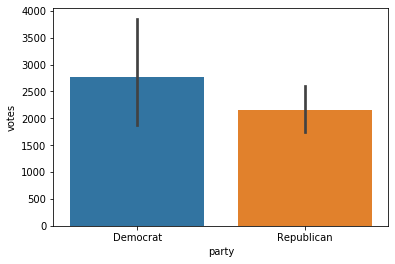

In [8]:
sns.barplot(x='party', y='votes', data=texas_prim)

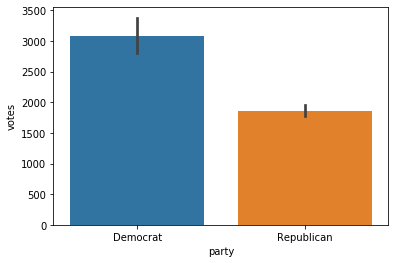

In [9]:
sns.barplot(x='party', y='votes', data=primary)

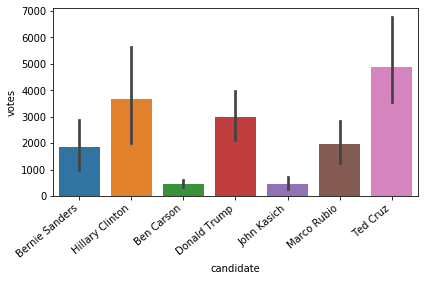

In [10]:
#plt.figure(figsize=(10,10))
ax = sns.barplot(x='candidate', y='votes', data=texas_prim)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

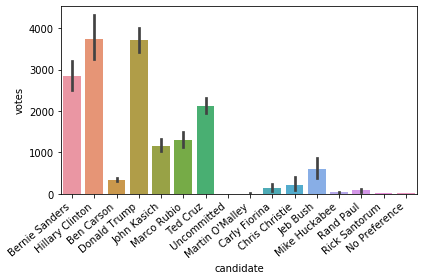

In [11]:
ax = sns.barplot(x='candidate', y='votes', data=primary)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [12]:
#primary_r['winner'] = primary
#Find how to make a column showing which Dem and Rep candidate won for each county

In [13]:
#stats.sort_values(by=['Black'], inplace=True, ascending=False)
#stats.head(10)

In [14]:
prim = pd.merge(stats,primary)

In [15]:

prim.drop('county', axis=1, inplace=True)


In [16]:
prim = prim.rename(columns={'state_abbreviation': 'state1','area_name':'county'})

In [17]:
prim.drop('state', axis=1, inplace=True)


In [18]:
prim = prim.rename(columns={'state1': 'State'})

In [19]:
prim['Winner'] = np.where(prim['fraction_votes'] >  .4, 'Won','Lost' )
prim.loc[456:468]

,fips,county,State,Population,Age > 65,Black,Latino,White,HighSchool,Bachelors,Median Household,Poverty level,Population PSMile,party,candidate,votes,fraction_votes,Winner
456,1131,Wilcox County,AL,11098,17.7,71.0,1.0,27.6,76.1,11.1,23642,39.2,13.1,Democrat,Hillary Clinton,3337,0.843,Won
457,1131,Wilcox County,AL,11098,17.7,71.0,1.0,27.6,76.1,11.1,23642,39.2,13.1,Republican,Ben Carson,44,0.083,Lost
458,1131,Wilcox County,AL,11098,17.7,71.0,1.0,27.6,76.1,11.1,23642,39.2,13.1,Republican,Donald Trump,287,0.544,Won
459,1131,Wilcox County,AL,11098,17.7,71.0,1.0,27.6,76.1,11.1,23642,39.2,13.1,Republican,John Kasich,12,0.023,Lost
460,1131,Wilcox County,AL,11098,17.7,71.0,1.0,27.6,76.1,11.1,23642,39.2,13.1,Republican,Marco Rubio,64,0.121,Lost
461,1131,Wilcox County,AL,11098,17.7,71.0,1.0,27.6,76.1,11.1,23642,39.2,13.1,Republican,Ted Cruz,114,0.216,Lost
462,1133,Winston County,AL,24150,20.0,1.0,2.9,94.0,72.7,10.4,32900,24.0,39.9,Democrat,Bernie Sanders,138,0.304,Lost
463,1133,Winston County,AL,24150,20.0,1.0,2.9,94.0,72.7,10.4,32900,24.0,39.9,Democrat,Hillary Clinton,303,0.667,Won
464,1133,Winston County,AL,24150,20.0,1.0,2.9,94.0,72.7,10.4,32900,24.0,39.9,Republican,Ben Carson,539,0.090,Lost
465,1133,Winston County,AL,24150,20.0,1.0,2.9,94.0,72.7,10.4,32900,24.0,39.9,Republican,Donald Trump,3352,0.561,Won


In [20]:
prim['Result'] = ''


In [21]:
prim.loc[prim['Winner'].str.contains('Won'), 'Result'] = prim['candidate']

prim.head()

,fips,county,State,Population,Age > 65,Black,Latino,White,HighSchool,Bachelors,Median Household,Poverty level,Population PSMile,party,candidate,votes,fraction_votes,Winner,Result
0,1001,Autauga County,AL,55395,13.8,18.7,2.7,75.6,85.6,20.9,53682,12.1,91.8,Democrat,Bernie Sanders,544,0.182,Lost,
1,1001,Autauga County,AL,55395,13.8,18.7,2.7,75.6,85.6,20.9,53682,12.1,91.8,Democrat,Hillary Clinton,2387,0.800,Won,Hillary Clinton
2,1001,Autauga County,AL,55395,13.8,18.7,2.7,75.6,85.6,20.9,53682,12.1,91.8,Republican,Ben Carson,1764,0.146,Lost,
3,1001,Autauga County,AL,55395,13.8,18.7,2.7,75.6,85.6,20.9,53682,12.1,91.8,Republican,Donald Trump,5387,0.445,Won,Donald Trump
4,1001,Autauga County,AL,55395,13.8,18.7,2.7,75.6,85.6,20.9,53682,12.1,91.8,Republican,John Kasich,421,0.035,Lost,


In [22]:
Rubio = prim[(prim['Winner'] == 'Won') &  prim['candidate'].str.contains('Marco Rubio')]
Rubio

,fips,county,State,Population,Age > 65,Black,Latino,White,HighSchool,Bachelors,Median Household,Poverty level,Population PSMile,party,candidate,votes,fraction_votes,Winner,Result
1758,12086,Miami-Dade County,FL,2662874,15.2,18.9,66.2,14.8,78.8,26.3,43100,19.9,1315.5,Republican,Marco Rubio,111898,0.627,Won,Marco Rubio
2210,13089,DeKalb County,GA,722161,10.4,54.8,8.9,29.9,88.4,39.7,50856,19.0,2585.7,Republican,Marco Rubio,18231,0.412,Won,Marco Rubio
2322,13121,Fulton County,GA,996319,10.4,44.3,7.6,40.5,90.4,48.2,56857,17.6,1748.0,Republican,Marco Rubio,35052,0.416,Won,Marco Rubio
15719,51013,Arlington County,VA,226908,9.3,9.1,15.7,62.8,93.3,71.7,103208,8.0,7993.6,Republican,Marco Rubio,10944,0.497,Won,Marco Rubio
16041,51107,Loudoun County,VA,363050,7.9,7.8,13.4,58.8,93.8,57.9,122238,3.6,605.8,Republican,Marco Rubio,20845,0.404,Won,Marco Rubio
16342,51510,Alexandria city,VA,150575,10.1,22.6,16.6,52.3,91.2,61.4,85706,8.4,9314.3,Republican,Marco Rubio,6338,0.468,Won,Marco Rubio
16363,51540,Charlottesville city,VA,45593,9.5,19.2,4.9,66.1,88.2,49.9,44601,27.5,4246.4,Republican,Marco Rubio,1344,0.475,Won,Marco Rubio
16412,51610,Falls Church city,VA,13601,11.4,5.3,9.5,72.3,97.3,74.4,120000,4.0,6169.1,Republican,Marco Rubio,707,0.451,Won,Marco Rubio
16461,51678,Lexington city,VA,7311,14.1,9.6,3.8,81.1,78.3,41.7,36505,25.2,2820.2,Republican,Marco Rubio,242,0.442,Won,Marco Rubio
16545,51760,Richmond city,VA,217853,11.4,49.7,6.6,40.2,81.5,34.8,40496,25.6,3414.7,Republican,Marco Rubio,6210,0.469,Won,Marco Rubio


In [23]:
stats_cor = prim.corr()
stats_cor

,fips,Population,Age > 65,Black,Latino,White,HighSchool,Bachelors,Median Household,Poverty level,Population PSMile,votes,fraction_votes
fips,1.000000,-0.037495,0.019943,-0.137506,0.170682,-0.032102,-0.013721,0.076719,0.102318,-0.102272,0.035873,-0.021331,0.051565
Population,-0.037495,1.000000,-0.226313,0.071147,0.188129,-0.234110,0.078141,0.333290,0.250424,-0.070258,0.324428,0.728027,0.037741
Age > 65,0.019943,-0.226313,1.000000,-0.224644,-0.228544,0.388685,0.111513,-0.240651,-0.275651,-0.093987,-0.126578,-0.166208,-0.013614
Black,-0.137506,0.071147,-0.224644,1.000000,-0.117822,-0.644277,-0.339155,-0.072445,-0.250349,0.463803,0.089303,0.062200,-0.021366
Latino,0.170682,0.188129,-0.228544,-0.117822,1.000000,-0.605044,-0.389901,0.015739,0.058993,0.095791,0.073013,0.103101,0.002899
White,-0.032102,-0.234110,0.388685,-0.644277,-0.605044,1.000000,0.490614,-0.016626,0.114165,-0.454508,-0.143122,-0.152724,-0.000362
HighSchool,-0.013721,0.078141,0.111513,-0.339155,-0.389901,0.490614,1.000000,0.590446,0.574329,-0.660147,0.029871,0.104978,0.022993
Bachelors,0.076719,0.333290,-0.240651,-0.072445,0.015739,-0.016626,0.590446,1.000000,0.688461,-0.407049,0.243085,0.310550,0.043597
Median Household,0.102318,0.250424,-0.275651,-0.250349,0.058993,0.114165,0.574329,0.688461,1.000000,-0.765324,0.148918,0.226869,0.024593
Poverty level,-0.102272,-0.070258,-0.093987,0.463803,0.095791,-0.454508,-0.660147,-0.407049,-0.765324,1.000000,-0.014062,-0.081253,0.003784


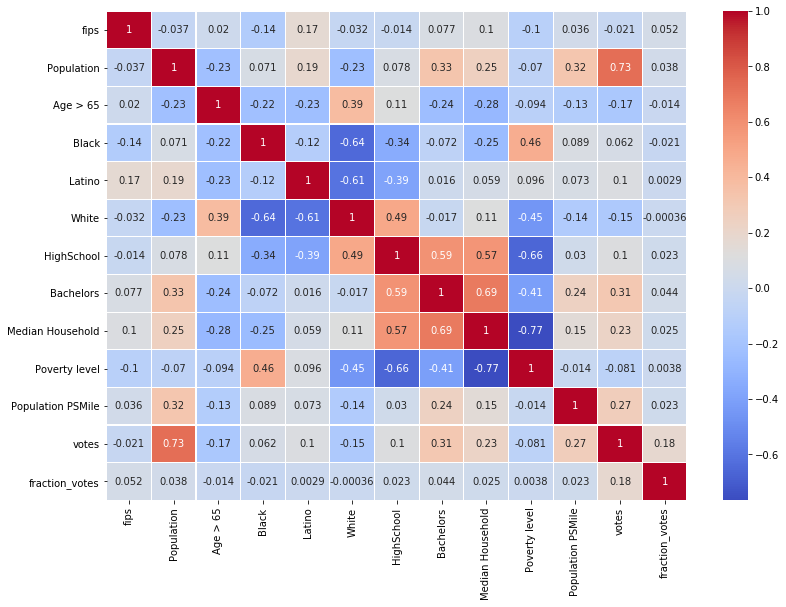

In [24]:
plt.subplots(figsize=(13,9))
sns.heatmap(stats_cor, cmap='coolwarm',linewidth=.2,linecolor='white',annot=True)

In [25]:
trump = prim.loc[prim['candidate'] == 'Donald Trump']
trump.head()

,fips,county,State,Population,Age > 65,Black,Latino,White,HighSchool,Bachelors,Median Household,Poverty level,Population PSMile,party,candidate,votes,fraction_votes,Winner,Result
3,1001,Autauga County,AL,55395,13.8,18.7,2.7,75.6,85.6,20.9,53682,12.1,91.8,Republican,Donald Trump,5387,0.445,Won,Donald Trump
10,1003,Baldwin County,AL,200111,18.7,9.6,4.6,83.0,89.1,27.7,50221,13.9,114.6,Republican,Donald Trump,23618,0.469,Won,Donald Trump
17,1005,Barbour County,AL,26887,16.5,47.6,4.5,46.6,73.7,13.4,32911,26.7,31.0,Republican,Donald Trump,1710,0.501,Won,Donald Trump
24,1007,Bibb County,AL,22506,14.8,22.1,2.1,74.5,77.5,12.1,36447,18.1,36.8,Republican,Donald Trump,1959,0.494,Won,Donald Trump
31,1009,Blount County,AL,57719,17.0,1.8,8.7,87.8,77.0,12.1,44145,15.8,88.9,Republican,Donald Trump,7390,0.487,Won,Donald Trump


In [26]:
Clinton = prim.loc[prim['candidate'] == 'Hillary Clinton']
Clinton.head()

,fips,county,State,Population,Age > 65,Black,Latino,White,HighSchool,Bachelors,Median Household,Poverty level,Population PSMile,party,candidate,votes,fraction_votes,Winner,Result
1,1001,Autauga County,AL,55395,13.8,18.7,2.7,75.6,85.6,20.9,53682,12.1,91.8,Democrat,Hillary Clinton,2387,0.800,Won,Hillary Clinton
8,1003,Baldwin County,AL,200111,18.7,9.6,4.6,83.0,89.1,27.7,50221,13.9,114.6,Democrat,Hillary Clinton,5290,0.647,Won,Hillary Clinton
15,1005,Barbour County,AL,26887,16.5,47.6,4.5,46.6,73.7,13.4,32911,26.7,31.0,Democrat,Hillary Clinton,2567,0.906,Won,Hillary Clinton
22,1007,Bibb County,AL,22506,14.8,22.1,2.1,74.5,77.5,12.1,36447,18.1,36.8,Democrat,Hillary Clinton,942,0.755,Won,Hillary Clinton
29,1009,Blount County,AL,57719,17.0,1.8,8.7,87.8,77.0,12.1,44145,15.8,88.9,Democrat,Hillary Clinton,564,0.551,Won,Hillary Clinton


In [27]:
Sanders = prim.loc[prim['candidate'] == 'Bernie Sanders']
Sanders.head()

,fips,county,State,Population,Age > 65,Black,Latino,White,HighSchool,Bachelors,Median Household,Poverty level,Population PSMile,party,candidate,votes,fraction_votes,Winner,Result
0,1001,Autauga County,AL,55395,13.8,18.7,2.7,75.6,85.6,20.9,53682,12.1,91.8,Democrat,Bernie Sanders,544,0.182,Lost,
7,1003,Baldwin County,AL,200111,18.7,9.6,4.6,83.0,89.1,27.7,50221,13.9,114.6,Democrat,Bernie Sanders,2694,0.329,Lost,
14,1005,Barbour County,AL,26887,16.5,47.6,4.5,46.6,73.7,13.4,32911,26.7,31.0,Democrat,Bernie Sanders,222,0.078,Lost,
21,1007,Bibb County,AL,22506,14.8,22.1,2.1,74.5,77.5,12.1,36447,18.1,36.8,Democrat,Bernie Sanders,246,0.197,Lost,
28,1009,Blount County,AL,57719,17.0,1.8,8.7,87.8,77.0,12.1,44145,15.8,88.9,Democrat,Bernie Sanders,395,0.386,Lost,


In [28]:
trump1 = trump.describe()
trump1

,fips,Population,Age > 65,Black,Latino,White,HighSchool,Bachelors,Median Household,Poverty level,Population PSMile,votes,fraction_votes
count,2711.000000,2.711000e+03,2711.000000,2711.000000,2711.000000,2711.000000,2711.000000,2711.000000,2711.000000,2711.000000,2711.000000,2711.000000,2711.00000
mean,31364.923644,1.042027e+05,17.554408,10.368425,9.162597,76.209923,83.786167,19.052121,44939.247879,17.335448,270.849465,4632.818886,0.46973
std,15151.380146,3.295879e+05,4.334688,15.154429,13.943778,20.135655,6.908463,8.518343,11682.896822,6.484075,1822.694390,9967.092053,0.15818
min,1001.000000,8.600000e+01,4.100000,0.000000,0.200000,3.100000,45.000000,3.200000,19986.000000,0.900000,0.100000,0.000000,0.00000
25%,18170.000000,1.252600e+04,14.850000,0.900000,2.000000,64.150000,79.200000,13.200000,37435.500000,12.800000,21.500000,618.000000,0.35200
50%,31055.000000,2.738200e+04,17.200000,3.100000,3.800000,83.200000,85.000000,16.900000,43216.000000,16.600000,49.500000,1626.000000,0.45300
75%,46136.000000,7.190300e+04,19.800000,13.200000,9.200000,93.000000,89.100000,22.450000,50013.500000,20.950000,126.350000,4210.500000,0.55650
max,55141.000000,1.011670e+07,52.900000,85.100000,95.800000,98.600000,99.000000,74.400000,122238.000000,53.200000,69467.500000,179130.000000,0.91500


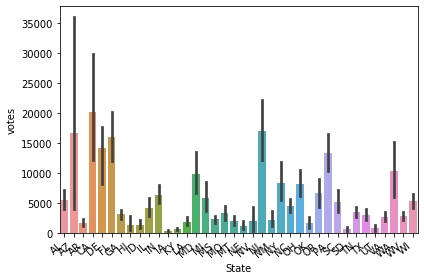

In [29]:
ax = sns.barplot(x='State', y='votes', data=trump)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [30]:
# Delaware, New Mexico and Arizona had the most Republican voters for Trump

In [31]:
# Which counties did Trump have the most REpublican votes?



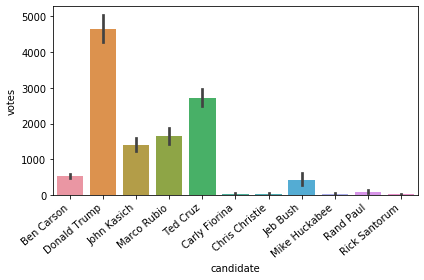

In [35]:
ax = sns.barplot(x='candidate', y='votes', data=Rep)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [ ]:
if prim['Result'] == 'test',

In [ ]:
data = [go.Scatter(
    x= prim['White'],
    y= prim['Median Household'],
    text = prim['Result'],
    #marker = dict(size = 100 * prim['fraction_votes'])
)]

    
   


In [ ]:
fig = go.Figure(data=data)
pyo.plot(fig)

In [ ]:
prim['Result'].replace('', np.nan, inplace=True)
prim.dropna(subset=['Result'], inplace=True)
prim.head()

In [34]:
Dem =  prim[prim.party.str.contains("Democrat")]
Rep =  prim[prim.party.str.contains("Republican")]
Dem

,fips,county,State,Population,Age > 65,Black,Latino,White,HighSchool,Bachelors,Median Household,Poverty level,Population PSMile,party,candidate,votes,fraction_votes,Winner,Result
0,1001,Autauga County,AL,55395,13.8,18.7,2.7,75.6,85.6,20.9,53682,12.1,91.8,Democrat,Bernie Sanders,544,0.182,Lost,
1,1001,Autauga County,AL,55395,13.8,18.7,2.7,75.6,85.6,20.9,53682,12.1,91.8,Democrat,Hillary Clinton,2387,0.800,Won,Hillary Clinton
7,1003,Baldwin County,AL,200111,18.7,9.6,4.6,83.0,89.1,27.7,50221,13.9,114.6,Democrat,Bernie Sanders,2694,0.329,Lost,
8,1003,Baldwin County,AL,200111,18.7,9.6,4.6,83.0,89.1,27.7,50221,13.9,114.6,Democrat,Hillary Clinton,5290,0.647,Won,Hillary Clinton
14,1005,Barbour County,AL,26887,16.5,47.6,4.5,46.6,73.7,13.4,32911,26.7,31.0,Democrat,Bernie Sanders,222,0.078,Lost,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17474,56041,Uinta County,WY,20904,11.0,0.9,9.2,87.3,89.2,18.9,58515,13.3,10.1,Democrat,Hillary Clinton,4,0.444,Won,Hillary Clinton
17475,56043,Washakie County,WY,8322,20.1,0.8,13.9,82.7,90.5,23.6,47104,12.1,3.8,Democrat,Bernie Sanders,1,0.333,Lost,
17476,56043,Washakie County,WY,8322,20.1,0.8,13.9,82.7,90.5,23.6,47104,12.1,3.8,Democrat,Hillary Clinton,2,0.667,Won,Hillary Clinton
17477,56045,Weston County,WY,7201,18.1,0.7,4.2,91.5,90.2,17.2,55461,11.2,3.0,Democrat,Bernie Sanders,1,0.500,Won,Bernie Sanders


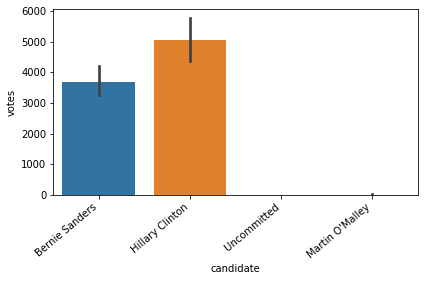

In [37]:
ax = sns.barplot(x='candidate', y='votes', data=Dem)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [51]:
import plotly.express as px
fig = px.scatter(Dem, x='Black', y='Median Household', color='Result',)
fig.show()

In [52]:
fig = px.scatter(Rep, x='Black', y='Median Household', color='Result',)
fig.show()

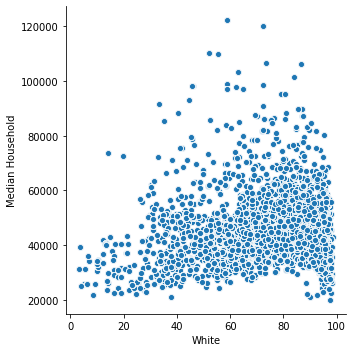

In [43]:
sns.relplot(x="White", y="Median Household", data=prim)

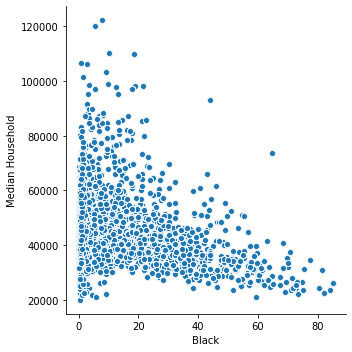

In [44]:
sns.relplot(x="Black", y="Median Household", data=prim)

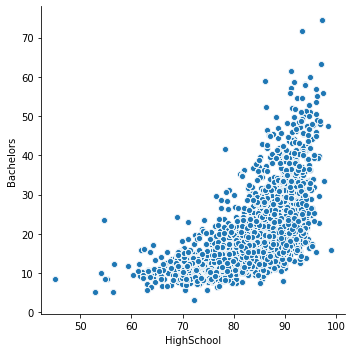

In [45]:
sns.relplot(x="HighSchool", y="Bachelors", data=prim)

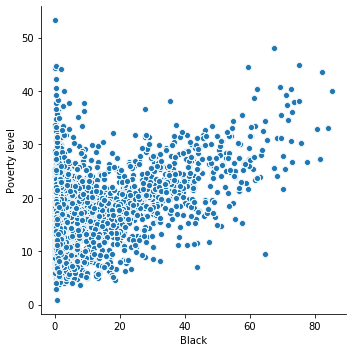

In [47]:
sns.relplot(x="Black", y="Poverty level", data=prim)

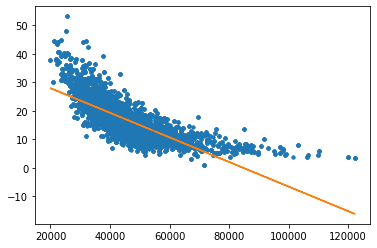

In [49]:
from numpy.polynomial.polynomial import polyfit
x = prim['Median Household']
y = prim['Poverty level']
# Fit with polyfit
b, m = polyfit(x, y, 1)

plt.plot(x, y, '.')
plt.plot(x, b + m * x)
plt.show()

In [59]:
prim.groupby(['county','Population']).sum()

fips  Age > 65  Black  Latino   White  \
county           Population                                            
Abbeville County 24965       360008     155.2  226.4     9.6   550.4   
Acadia Parish    62486       132006      81.0  109.8    13.2   466.8   
Accomack County  33021       357007     149.1  196.7    62.3   427.7   
Ada County       426236       96006      75.6    7.8    46.2   513.0   
Adair County     7454        285015     331.5    6.0    25.5  1452.0   
...                             ...       ...    ...     ...     ...   
Yuma County      10202        16250      34.8    0.8    43.8   153.2   
                 203247       20135      87.0   13.5   308.5   164.5   
Zapata County    14319       339535      81.2    2.8   657.3    38.5   
Zavala County    12267       339549      87.5    9.1   651.0    43.4   
Ziebach County   2826        230685      33.5    1.5    18.5   120.0   

                             HighSchool  Bachelors  Median Household  \
county           Population                                            
Abbeville County 24965            614.4       97.6            287576   
Acadia Parish    62486            432.6       61.2            225522   
Accomack County  33021            546.0      120.4            275296   
Ada County       426236           561.6      216.0            331260   
Adair County     7454            1360.5      244.5            718380   
...                                 ...        ...               ...   
Yuma County      10202            176.0       35.4             88616   
                 203247           359.5       71.5            207975   
Zapata County    14319            383.6       59.5            217763   
Zavala County    12267            422.1       65.8            179375   
Ziebach County   2826             412.5       73.5            163540   

                             Poverty level  Population PSMile  votes  \
county           Population                                            
Abbeville County 24965               172.8              414.4   5480   
Acadia Parish    62486               112.2              565.8   6629   
Accomack County  33021               143.5              516.6   6750   
Ada County       426236               78.6             2236.8  57726   
Adair County     7454                142.5              202.5    705   
...                                    ...                ...    ...   
Yuma County      10202                16.4                8.4     78   
                 203247              101.0              177.5  13982   
Zapata County    14319               242.9               98.0   2735   
Zavala County    12267               245.0               63.0   1930   
Ziebach County   2826                211.5                7.0    339   

                             fraction_votes  
county           Population                  
Abbeville County 24965                1.988  
Acadia Parish    62486                1.818  
Accomack County  33021                1.985  
Ada County       426236               1.961  
Adair County     7454                 1.996  
...                                     ...  
Yuma County      10202                0.929  
                 203247               1.794  
Zapata County    14319                1.856  
Zavala County    12267                0.936  
Ziebach County   2826                 2.000  

[2798 rows x 12 columns]

In [55]:
prim.loc[prim['State'] == 'SC']

,fips,county,State,Population,Age > 65,Black,Latino,White,HighSchool,Bachelors,Median Household,Poverty level,Population PSMile,party,candidate,votes,fraction_votes,Winner,Result
12386,45001,Abbeville County,SC,24965,19.4,28.3,1.2,68.8,76.8,12.2,35947,21.6,51.8,Democrat,Bernie Sanders,312,0.170,Lost,
12387,45001,Abbeville County,SC,24965,19.4,28.3,1.2,68.8,76.8,12.2,35947,21.6,51.8,Democrat,Hillary Clinton,1501,0.818,Won,Hillary Clinton
12388,45001,Abbeville County,SC,24965,19.4,28.3,1.2,68.8,76.8,12.2,35947,21.6,51.8,Republican,Ben Carson,305,0.083,Lost,
12389,45001,Abbeville County,SC,24965,19.4,28.3,1.2,68.8,76.8,12.2,35947,21.6,51.8,Republican,Donald Trump,1353,0.369,Lost,
12390,45001,Abbeville County,SC,24965,19.4,28.3,1.2,68.8,76.8,12.2,35947,21.6,51.8,Republican,Jeb Bush,236,0.064,Lost,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12749,45091,York County,SC,245346,13.1,19.5,5.0,71.6,87.5,28.5,53740,13.4,332.2,Republican,Donald Trump,12031,0.317,Lost,
12750,45091,York County,SC,245346,13.1,19.5,5.0,71.6,87.5,28.5,53740,13.4,332.2,Republican,Jeb Bush,2036,0.054,Lost,
12751,45091,York County,SC,245346,13.1,19.5,5.0,71.6,87.5,28.5,53740,13.4,332.2,Republican,John Kasich,2632,0.069,Lost,
12752,45091,York County,SC,245346,13.1,19.5,5.0,71.6,87.5,28.5,53740,13.4,332.2,Republican,Marco Rubio,8089,0.213,Lost,


In [ ]:
#MACHINE LEARNING 

In [ ]:
y = prim['Latino']
x1 = prim['Median Household']

In [ ]:
plt.scatter(x1,y)
plt.xlabel('Median Household', fontsize = 15)
plt.ylabel('Black', fontsize = 15)
plt.show()

In [ ]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

In [ ]:
plt.scatter(x1,y)
yhat = -188.8559*x1 + 4.693e+04
figure = plt.plot(x1,yhat, lw=1, color = 'red', label = 'regression line')
plt.show()

In [ ]:
prim.groupby('State')

In [ ]:
prim